In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve)
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/customer_churn_telecom_services.csv')

In [ ]:
display(df)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


* Divisão em classe 1 e classe 2

In [ ]:
positive_label = df['Churn'].value_counts()['Yes']
negative_label = df['Churn'].value_counts()['No']

print(f"Contagem de positivos: {positive_label}")
print(f"Contagem de negativos: {negative_label}")

Contagem de positivos: 1869
Contagem de negativos: 5174


In [ ]:
classe1 = df[df['Churn']=='No']
classe2 = df[df['Churn']== 'Yes']

In [ ]:
print(f"Contagem classe1: {len(classe1)}")
print(f"Contagem classe2: {len(classe2)}")

Contagem classe1: 5174
Contagem classe2: 1869


In [ ]:
n = len(classe1)
n50 = n // 2
rest_size = n - n50
n25 = rest_size // 2

* Slicing da classe 1 (50/25/25)

In [ ]:
c1_50 = classe1.sample(n=n50, random_state=1)
rest1 = classe1.drop(c1_50.index)

c1_25A = rest1.sample(n=n25, random_state=2)
c1_25B = rest1.drop(c1_25A.index)

print(f"Contagem classe1_50: {len(c1_50)}")
print(f"Contagem rest1: {len(rest1)}")
print(f"Contagem classe1_25A: {len(c1_25A)}")
print(f"Contagem classe1_25B: {len(c1_25B)}")

Contagem classe1_50: 2587
Contagem rest1: 2587
Contagem classe1_25A: 1293
Contagem classe1_25B: 1294


* Oversampling da classe 2 + Slicing (50/25/25)

In [ ]:
c2_50 = classe2.sample(frac=0.5, random_state=3)
rest2 = classe2.drop(c2_50.index)
c2_25A = rest2.sample(frac=0.5, random_state=4)
c2_25B = rest2.drop(c2_25A.index)

print(f"Contagem classe2_50: {len(c2_50)}")
print(f"Contagem rest2: {len(rest2)}")
print(f"Contagem classe2_25A: {len(c2_25A)}")
print(f"Contagem classe2_25B: {len(c2_25B)}")

c2_50_bal = c2_50.sample(n=len(c1_50), replace=True, random_state=5)
c2_25A_bal = c2_25A.sample(n=len(c1_25A), replace=True, random_state=6)
c2_25B_bal = c2_25B.sample(n=len(c1_25B), replace=True, random_state=7)

print(f"Contagem classe2_50_bal: {len(c2_50_bal)}")
print(f"Contagem classe2_25A_bal: {len(c2_25A_bal)}")
print(f"Contagem classe2_25B_bal: {len(c2_25B_bal)}")

train_df = pd.concat([c1_50, c2_50_bal]).sample(frac=1, random_state=10)
validation_df = pd.concat([c1_25A, c2_25A_bal]).sample(frac=1, random_state=11)
test_df = pd.concat([c1_25B, c2_25B])

Contagem classe2_50: 934
Contagem rest2: 935
Contagem classe2_25A: 468
Contagem classe2_25B: 467
Contagem classe2_50_bal: 2587
Contagem classe2_25A_bal: 1293
Contagem classe2_25B_bal: 1294


* Montando Treino, Validação e Teste

In [ ]:
train_df = pd.concat([c1_50, c2_50_bal]).sample(frac=1, random_state=10).reset_index(drop=True)
validation_df = pd.concat([c1_25A, c2_25A_bal]).sample(frac=1, random_state=11).reset_index(drop=True)
test_df = pd.concat([c1_25B, c2_25B]).sample(frac=1, random_state=12).reset_index(drop=True)

train_df.shape, validation_df.shape, test_df.shape

((5174, 20), (2586, 20), (1761, 20))

* Separando X e y

In [ ]:
X_train = train_df.drop(columns=['Churn'])
y_train = train_df['Churn']

X_val = validation_df.drop(columns=['Churn'])
y_val = validation_df['Churn']

X_test = test_df.drop(columns=['Churn'])
y_test = test_df['Churn']

print("Treino:")
print(X_train.shape, y_train.shape)

print("\nValidação:")
print(X_val.shape, y_val.shape)

print("\nTeste:")
print(X_test.shape, y_test.shape)


Treino:
(5174, 19) (5174,)

Validação:
(2586, 19) (2586,)

Teste:
(1761, 19) (1761,)


In [ ]:
print("Treino:")
print(y_train.value_counts(normalize=True))

print("\nValidação:")
print(y_val.value_counts(normalize=True))

print("\nTeste:")
print(y_test.value_counts(normalize=True))


Treino:
Churn
No     0.5
Yes    0.5
Name: proportion, dtype: float64

Validação:
Churn
Yes    0.5
No     0.5
Name: proportion, dtype: float64

Teste:
Churn
No     0.73481
Yes    0.26519
Name: proportion, dtype: float64


#Pipeline

In [ ]:
#@title Conjunto de Treinamento

X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5174 non-null   object 
 1   SeniorCitizen     5174 non-null   int64  
 2   Partner           5174 non-null   object 
 3   Dependents        5174 non-null   object 
 4   tenure            5174 non-null   int64  
 5   PhoneService      5174 non-null   object 
 6   MultipleLines     5174 non-null   object 
 7   InternetService   5174 non-null   object 
 8   OnlineSecurity    5174 non-null   object 
 9   OnlineBackup      5174 non-null   object 
 10  DeviceProtection  5174 non-null   object 
 11  TechSupport       5174 non-null   object 
 12  StreamingTV       5174 non-null   object 
 13  StreamingMovies   5174 non-null   object 
 14  Contract          5174 non-null   object 
 15  PaperlessBilling  5174 non-null   object 
 16  PaymentMethod     5174 non-null   object 


In [ ]:
X_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5171.000000
mean,0.191728,28.475647,68.711133,2104.151392
std,0.393698,23.980445,28.903285,2182.742201
min,0.000000,0.000000,18.400000,18.900000
25%,0.000000,5.000000,47.150000,295.525000
50%,0.000000,23.000000,75.050000,1244.500000
75%,0.000000,50.000000,92.850000,3436.100000
max,1.000000,72.000000,118.750000,8672.450000


In [ ]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print(f"Colunas numéricas: {num_cols}")
print(f"Colunas categóricas: {cat_cols}")

Colunas numéricas: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Colunas categóricas: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


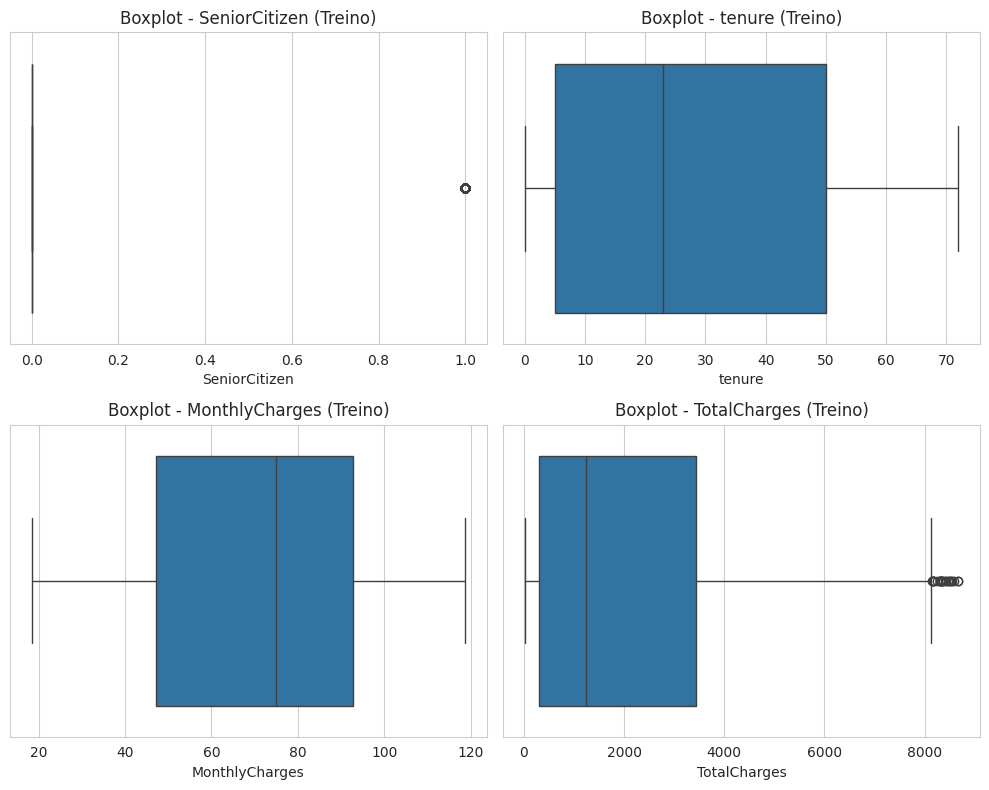

In [ ]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot - {col} (Treino)')
plt.tight_layout()
plt.show()

In [ ]:
def preprocess_data(X_train, y_train, X_val, y_val, X_test, y_test):
    # Make copies to avoid modifying original dataframes directly
    X_train_processed = X_train.copy()
    y_train_processed = y_train.copy()

    X_val_processed = X_val.copy()
    y_val_processed = y_val.copy()
    X_test_processed = X_test.copy()
    y_test_processed = y_test.copy()

    # Reset indices for all processed sets immediately to handle potential duplicates
    # from sampling/concatenation and ensure consistent indexing.
    # This is crucial before any subsequent operations that rely on unique indices.
    X_train_processed = X_train_processed.reset_index(drop=True)
    y_train_processed = y_train_processed.reset_index(drop=True)
    X_val_processed = X_val_processed.reset_index(drop=True)
    y_val_processed = y_val_processed.reset_index(drop=True)
    X_test_processed = X_test_processed.reset_index(drop=True)
    y_test_processed = y_test_processed.reset_index(drop=True)

    # Handle missing TotalCharges
    X_train_processed['TotalCharges'] = X_train_processed['TotalCharges'].fillna(0.0)
    X_val_processed['TotalCharges'] = X_val_processed['TotalCharges'].fillna(0.0)
    X_test_processed['TotalCharges'] = X_test_processed['TotalCharges'].fillna(0.0)

    # Identify column types
    num_cols = X_train_processed.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = X_train_processed.select_dtypes(include=['object']).columns
    real_num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

    # Outlier removal (integrated as part of the pipeline)
    def remover_outliers_iqr_internal(df, y, columns):
        df_clean = df.copy()
        y_clean = y.copy()
        indices_to_drop = []

        print("--- Análise de Outliers (IQR) ---")
        for col in columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)].index
            indices_to_drop.extend(outliers)

            if len(outliers) > 0:
                print(f"Col {col}: {len(outliers)} outliers encontrados.")

        indices_to_drop = list(set(indices_to_drop))

        if indices_to_drop:
            print(f"\nRemovendo total de {len(indices_to_drop)} registros do Treino...")
            df_clean = df_clean.drop(indices_to_drop)
            y_clean = y_clean.drop(indices_to_drop)
            # Reset index AFTER dropping rows to ensure a unique, contiguous index
            df_clean = df_clean.reset_index(drop=True)
            y_clean = y_clean.reset_index(drop=True)
        else:
            print("\nNenhum outlier estatístico crítico encontrado.")

        return df_clean, y_clean

    X_train_processed, y_train_processed = remover_outliers_iqr_internal(X_train_processed, y_train_processed, real_num_cols)

    # 1. OneHotEncoder para as categóricas de texto
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoder.fit(X_train_processed[cat_cols])

    # Now, X_train_processed, X_val_processed, X_test_processed all have unique, contiguous integer indices (0, 1, 2...)
    # so we can safely use their indices when creating new DataFrames from transformed numpy arrays.
    train_cat = pd.DataFrame(encoder.transform(X_train_processed[cat_cols]), columns=encoder.get_feature_names_out(cat_cols), index=X_train_processed.index)
    val_cat = pd.DataFrame(encoder.transform(X_val_processed[cat_cols]), columns=encoder.get_feature_names_out(cat_cols), index=X_val_processed.index)
    test_cat = pd.DataFrame(encoder.transform(X_test_processed[cat_cols]), columns=encoder.get_feature_names_out(cat_cols), index=X_test_processed.index)

    # 2. MinMaxScaler para as numéricas contínuas (tenure, Monthly, Total)
    scaler = MinMaxScaler()
    scaler.fit(X_train_processed[real_num_cols])

    train_num = pd.DataFrame(scaler.transform(X_train_processed[real_num_cols]), columns=real_num_cols, index=X_train_processed.index)
    val_num = pd.DataFrame(scaler.transform(X_val_processed[real_num_cols]), columns=real_num_cols, index=X_val_processed.index)
    test_num = pd.DataFrame(scaler.transform(X_test_processed[real_num_cols]), columns=real_num_cols, index=X_test_processed.index)

    # 3. Tratamento especial para SeniorCitizen
    # These slices will automatically retain the reset index from X_processed
    train_senior = X_train_processed[['SeniorCitizen']]
    val_senior = X_val_processed[['SeniorCitizen']]
    test_senior = X_test_processed[['SeniorCitizen']]

    # Concatenate all processed features
    X_train_final = pd.concat([train_num, train_senior, train_cat], axis=1)
    X_val_final = pd.concat([val_num, val_senior, val_cat], axis=1)
    X_test_final = pd.concat([test_num, test_senior, test_cat], axis=1)

    # Codificando o Y
    le = LabelEncoder()
    y_train_final = le.fit_transform(y_train_processed)
    y_val_final = le.transform(y_val_processed)
    y_test_final = le.transform(y_test_processed)

    return X_train_final, y_train_final, X_val_final, y_val_final, X_test_final, y_test_final

In [ ]:
print("--- Executando o pré-processamento ---")
X_train_final, y_train_final, X_val_final, y_val_final, X_test_final, y_test_final = preprocess_data(X_train, y_train, X_val, y_val, X_test, y_test)

print("\n--- Pré-processamento Concluído ---")
print(f"Shape Final X_train: {X_train_final.shape}")
print(f"Shape Final y_train: {y_train_final.shape}")
print(f"Shape Final X_val:   {X_val_final.shape}")
print(f"Shape Final y_val:   {y_val_final.shape}")
print(f"Shape Final X_test:  {X_test_final.shape}")
print(f"Shape Final y_test:  {y_test_final.shape}")

print(f"\nProporcao y_train: {pd.Series(y_train_final).value_counts(normalize=True)}")
print(f"Proporcao y_val:   {pd.Series(y_val_final).value_counts(normalize=True)}")
print(f"Proporcao y_test:  {pd.Series(y_test_final).value_counts(normalize=True)}")


--- Executando o pré-processamento ---
--- Análise de Outliers (IQR) ---
Col TotalCharges: 24 outliers encontrados.

Removendo total de 24 registros do Treino...

--- Pré-processamento Concluído ---
Shape Final X_train: (5150, 45)
Shape Final y_train: (5150,)
Shape Final X_val:   (2586, 45)
Shape Final y_val:   (2586,)
Shape Final X_test:  (1761, 45)
Shape Final y_test:  (1761,)

Proporcao y_train: 1    0.50233
0    0.49767
Name: proportion, dtype: float64
Proporcao y_val:   1    0.5
0    0.5
Name: proportion, dtype: float64
Proporcao y_test:  0    0.73481
1    0.26519
Name: proportion, dtype: float64


#MLP

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
#@title Imports MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve
)
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import optuna

In [ ]:
#@title KS Function
def ks_statistic(y_true, y_pred_proba):
    data = np.vstack((y_true, y_pred_proba)).T
    df_temp = data[data[:, 0] == 1]
    df_temp2 = data[data[:, 0] == 0]

    cdf1 = np.sort(df_temp[:, 1])
    cdf2 = np.sort(df_temp2[:, 1])

    ks = stats.ks_2samp(cdf1, cdf2).statistic
    return ks

In [ ]:
def objective(trial):

    n_neurons = trial.suggest_int("n_neurons", 5, 50)
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "logistic"])
    lr = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    model = MLPClassifier(
        hidden_layer_sizes=(n_neurons,),
        activation=activation,
        solver="adam",
        learning_rate_init=lr,
        max_iter=10000,
        early_stopping=True,
        n_iter_no_change=20,
        validation_fraction=0.1,
        random_state=42
    )

    model.fit(X_train_final, y_train_final)

    proba = model.predict_proba(X_val_final)[:, 1]
    auc = roc_auc_score(y_val_final, proba)

    return auc

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

study.best_params

[I 2025-11-25 01:01:02,454] A new study created in memory with name: no-name-fc27ab81-5d6d-4594-a1e3-9891b8eb82c0
[I 2025-11-25 01:01:03,096] Trial 0 finished with value: 0.8226131666197128 and parameters: {'n_neurons': 16, 'activation': 'relu', 'learning_rate': 0.0004763702419481186}. Best is trial 0 with value: 0.8226131666197128.
[I 2025-11-25 01:01:08,688] Trial 1 finished with value: 0.8305762063439941 and parameters: {'n_neurons': 41, 'activation': 'tanh', 'learning_rate': 0.0002944302468198272}. Best is trial 1 with value: 0.8305762063439941.
[I 2025-11-25 01:01:09,919] Trial 2 finished with value: 0.8260662296654782 and parameters: {'n_neurons': 12, 'activation': 'relu', 'learning_rate': 0.0005931167508992314}. Best is trial 1 with value: 0.8305762063439941.
[I 2025-11-25 01:01:14,143] Trial 3 finished with value: 0.8219779417878049 and parameters: {'n_neurons': 32, 'activation': 'tanh', 'learning_rate': 0.00015303699424234089}. Best is trial 1 with value: 0.8305762063439941.
[

{'n_neurons': 6,
 'activation': 'logistic',
 'learning_rate': 0.00847756826555377}

In [ ]:
best_params = study.best_params

best_mlp = MLPClassifier(
    hidden_layer_sizes=(best_params["n_neurons"],),
    activation=best_params["activation"],
    solver="adam",
    learning_rate_init=best_params["learning_rate"],
    max_iter=10000,
    early_stopping=True,
    n_iter_no_change=20,
    validation_fraction=0.1,
    random_state=42
)

best_mlp.fit(X_train_final, y_train_final)

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(6,), learning_rate_init=0.00847756826555377,
              max_iter=10000, n_iter_no_change=20, random_state=42)

In [ ]:
#@title Predict
y_train_pred = best_mlp.predict(X_train_final)
y_val_pred   = best_mlp.predict(X_val_final)
y_test_pred  = best_mlp.predict(X_test_final)

y_train_proba = best_mlp.predict_proba(X_train_final)[:, 1]
y_val_proba   = best_mlp.predict_proba(X_val_final)[:, 1]
y_test_proba  = best_mlp.predict_proba(X_test_final)[:, 1]

In [ ]:
#@title Evaluate
evaluate("Treino", y_train_final, y_train_pred, y_train_proba)
evaluate("Validação", y_val_final, y_val_pred, y_val_proba)
evaluate("Teste", y_test_final, y_test_pred, y_test_proba)

RESULTADOS: Train
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2563
           1       0.77      0.77      0.77      2587

    accuracy                           0.77      5150
   macro avg       0.77      0.77      0.77      5150
weighted avg       0.77      0.77      0.77      5150

AUC: 0.8531042468864626
KS: 0.5591351517333358
RESULTADOS: Validation
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1293
           1       0.75      0.77      0.76      1293

    accuracy                           0.76      2586
   macro avg       0.76      0.76      0.76      2586
weighted avg       0.76      0.76      0.76      2586

AUC: 0.8385159186026968
KS: 0.5305491105955144
RESULTADOS: Test
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1294
           1       0.55      0.80      0.65       467

    accuracy                  

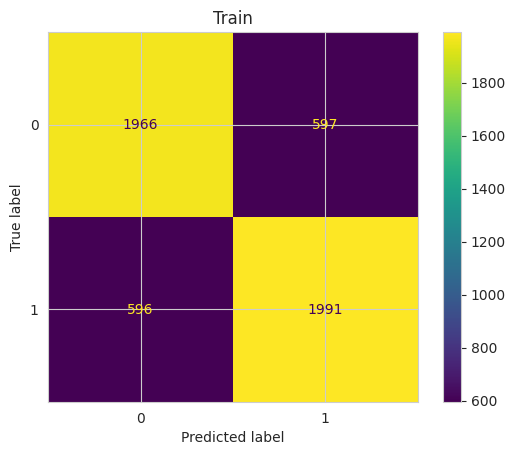

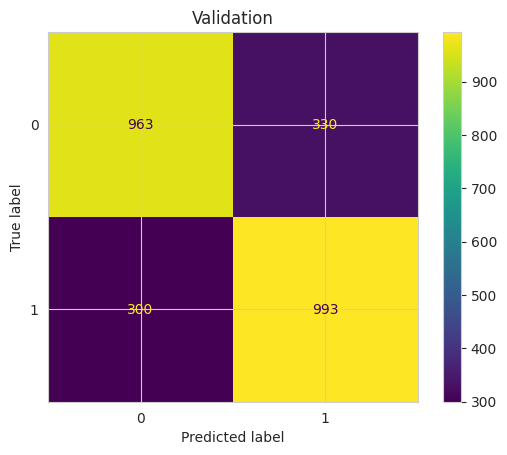

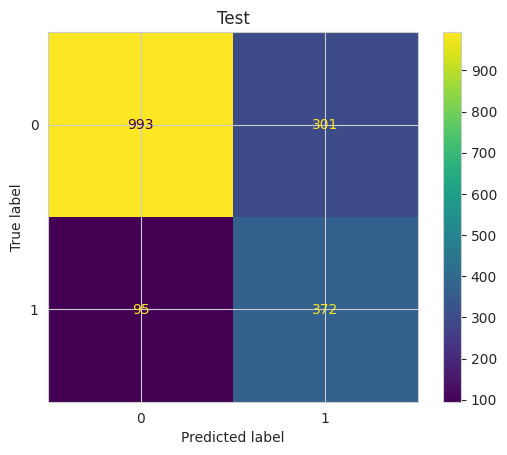

In [ ]:
#@title Confusion Matrix
for title, y_true, y_pred in [
    ("Treino", y_train_final, y_train_pred),
    ("Validação", y_val_final, y_val_pred),
    ("Teste", y_test_final, y_test_pred)
]:
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.title(title)
    plt.show()

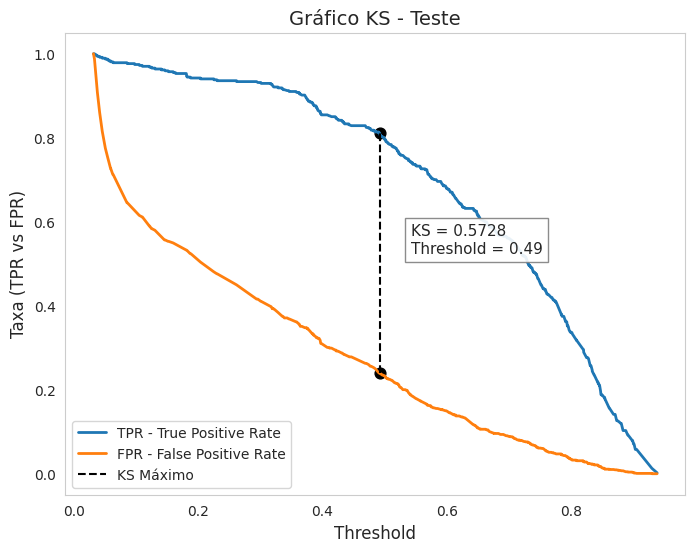

In [ ]:
import seaborn as sns

y_test_proba = best_mlp.predict_proba(X_test_final)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_final, y_test_proba)

ks_values = tpr - fpr
ks_index = np.argmax(ks_values)
ks_value = ks_values[ks_index]
ks_threshold = thresholds[ks_index]

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

plt.plot(thresholds, tpr, label='TPR - True Positive Rate', linewidth=2)
plt.plot(thresholds, fpr, label='FPR - False Positive Rate', linewidth=2)

plt.plot([ks_threshold, ks_threshold], [fpr[ks_index], tpr[ks_index]],
         color='black', linestyle='--', linewidth=1.5, label='KS Máximo')

plt.scatter(ks_threshold, tpr[ks_index], color='black', s=60)
plt.scatter(ks_threshold, fpr[ks_index], color='black', s=60)

plt.text(ks_threshold + 0.05,
         (tpr[ks_index] + fpr[ks_index]) / 2,
         f'KS = {ks_value:.4f}\nThreshold = {ks_threshold:.2f}',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))

plt.title('Gráfico KS - Teste', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Taxa (TPR vs FPR)', fontsize=12)
plt.legend(loc='lower left', fontsize=10)
plt.grid()
plt.show()

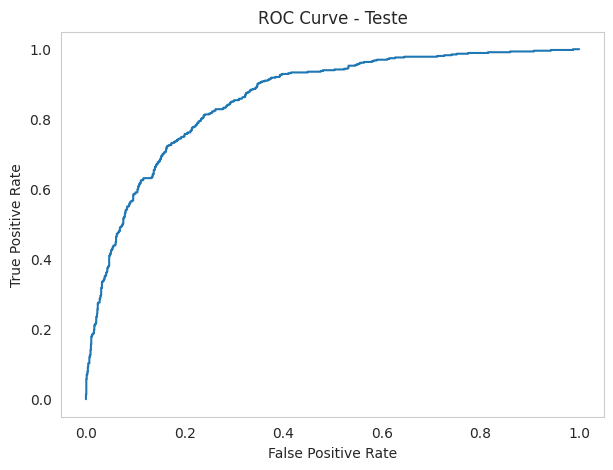

In [ ]:
#@title ROC
# ROC Curve
fpr, tpr, _ = roc_curve(y_test_final, y_test_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr)
plt.title("ROC Curve - Teste")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

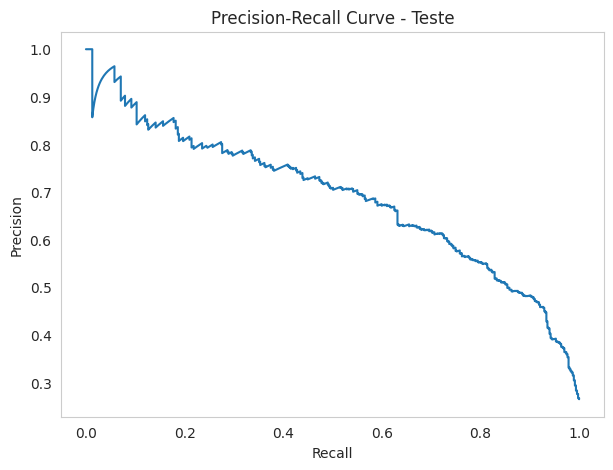

In [ ]:
#@title PR
# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test_final, y_test_proba)

plt.figure(figsize=(7, 5))
plt.plot(rec, prec)
plt.title("Precision-Recall Curve - Teste")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

In [ ]:
results = []

configurations = [
    ((10,), 'relu', 0.0005),
    ((20,), 'relu', 0.0005),
    ((10,10), 'relu', 0.0005),
    ((10,), 'tanh', 0.0005),
    ((10,), 'logistic', 0.001),
]

for hl, act, lr in configurations:
    model = MLPClassifier(
        hidden_layer_sizes=hl,
        activation=act,
        solver='adam',
        learning_rate_init=lr,
        max_iter=10000,
        early_stopping=True,
        n_iter_no_change=20,
        validation_fraction=0.1,
        random_state=42
    )

    model.fit(X_train_final, y_train_final)
    proba_test = model.predict_proba(X_test_final)[:, 1]
    auc = roc_auc_score(y_test_final, proba_test)
    ks = ks_statistic(y_test_final, proba_test)

    results.append([hl, act, lr, auc, ks])

import pandas as pd
df_results = pd.DataFrame(results, columns=["Camadas", "Ativação", "LR", "AUC", "KS"])
df_results

,Camadas,Ativação,LR,AUC,KS
0,"(10,)",relu,0.0005,0.845312,0.557973
1,"(20,)",relu,0.0005,0.854614,0.566103
2,"(10, 10)",relu,0.0005,0.838279,0.551903
3,"(10,)",tanh,0.0005,0.854657,0.569388
4,"(10,)",logistic,0.0010,0.852039,0.565378
